## Домашнее задание №3
### Волкова Юлия, МОиАД, 1 курс

Построим двумя способами доверительные интервалы для дисперсии нормального распределения, когда математиеское ожидание известно (будем считать, что оно равно нулю).

- С помощью статистики $ \frac {\sum X_k^2}{n}$ получаем интервал

$$ (\frac {\sum X_k^2}{\lambda_{\frac{1+\gamma}{2}}}, \quad \frac {\sum X_k^2}{\lambda_{\frac{1-\gamma}{2}}} )$$

где $\lambda_{p}$ $-$ квантиль порядка $p$ распределения хи-квадрат с $n$ степенями
свободы.

- С помощью статистики $(\frac {\sum X_k}{n})^{2}$ получаем интервал

$$  (n \cdot \frac{\bar{X}^{2}}{z_{\frac{3+\gamma}{4}}^2}, \quad n \cdot \frac{\bar{X}^{2}}{z_{\frac{3-\gamma}{4}}^2}) $$

где $z_{p}$ $-$ квантиль порядка $p $ стандартного нормального распределения.

### Задание 1.

Численно исследуйте поведение этих доверительных интервалов при увеличении объема выборки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import norm

### Доверительный интервал с помощью статистики $ \frac {\sum X_k^2}{n}$

In [2]:
def first_stat(gamma, mu, sigma, N):
    
    array_of_left_borders = []
    array_of_right_borders = []
    for i in range(10, N + 10, 10):        
        sample = np.random.normal(mu, sigma, size = i)
        array_of_left_borders.append(np.sum(np.square(sample)) / chi2.ppf((1 + gamma) / 2, len(sample)))
        array_of_right_borders.append(np.sum(np.square(sample)) / chi2.ppf((1 - gamma) / 2, len(sample)))
        
    return array_of_left_borders, array_of_right_borders

In [3]:
answer = first_stat(0.95, 0, 1, 1000)

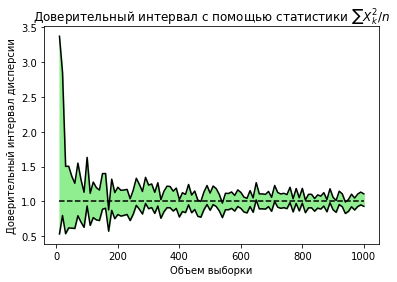

In [14]:
x = np.linspace(10, 1000, 100)
plt.fill_between(x, answer[1], answer[0], color = "lightgreen")
plt.plot(x, answer[1], color = "black")
plt.plot(x, answer[0], color = "black")
plt.plot(x, [1]*100, color = "black", linestyle = "dashed")
plt.xlabel("Объем выборки")
plt.ylabel("Доверительный интервал дисперсии")
plt.title("Доверительный интервал с помощью статистики $\sum X_k^2/n$")
plt.show()

### Доверительный интервал с помощью статистики $(\sum \frac {X_k}{n})^{2}$

In [5]:
def second_stat(gamma, mu, sigma, N):
    
    array_of_left_borders = []
    array_of_right_borders = []
    for i in range(10, N + 10, 10):        
        sample = np.random.normal(mu, sigma, size = i)
        array_of_left_borders.append(i * (np.square(np.mean(sample))) / np.square(norm.ppf((3 + gamma) / 4)))
        array_of_right_borders.append(i * (np.square(np.mean(sample))) / np.square(norm.ppf((3 - gamma) / 4)))
        
    return array_of_left_borders, array_of_right_borders

In [6]:
answer_2 = second_stat(0.95, 0, 1, 1000)

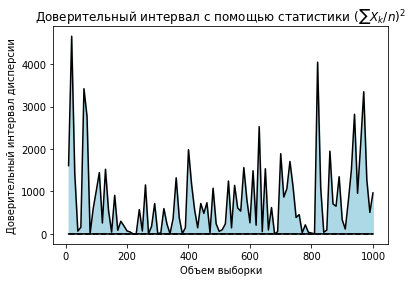

In [15]:
x = np.linspace(10, 1000, 100)
plt.fill_between(x, answer_2[1], answer_2[0], color = "lightblue")
plt.plot(x, answer_2[1], color = "black")
plt.plot(x, answer_2[0], color = "black")
plt.plot(x, [1]*100, color = "black", linestyle = "dashed")
plt.xlabel("Объем выборки")
plt.ylabel("Доверительный интервал дисперсии")
plt.title("Доверительный интервал с помощью статистики $({\sum X_k}/{n})^{2}$")
plt.show()

Доверительный интервал с помощью статистики  $(\frac {\sum X_k}{n})^{2}$ не дает никакой информации об истинном значении дисперсиии, т.к. с увеличением объема выборки, доверительный интервал не сужается. 